In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44715")
client

<Client: 'tcp://127.0.0.1:44715' processes=8 threads=32, memory=125.87 GiB>

In [11]:
client.restart()

<Client: 'tcp://127.0.0.1:44583' processes=0 threads=0, memory=0 B>

In [2]:
import numpy as np
import xarray as xr
import xrft
import xwavelet
import os.path as op
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/tank/groups/climode/tuchida/pyqg-runs/'

In [4]:
N = 512
run = 2

if run == 2:
    ds = xr.open_zarr(op.join(ddir,'Two-layer-QG/N%04d/rd=100km_A1e-15_outputs%02d.zarr' 
                              % (N,run))
                     )
    try:
        ds2 = xr.open_zarr(op.join(ddir,'Two-layer-QG/N%04d/rd=100km_A1e-15_outputs%02d-doubled.zarr' 
                                   % (N,run))
                         )
    except:
        pass
else:
    ds = xr.open_zarr(op.join(ddir,'Two-layer-QG/N%04d/rd=100km_A1e-15_outputs.zarr' % N)
                     )
    ds2 = xr.open_zarr(op.join(ddir,'Two-layer-QG/N%04d/rd=100km_A1e-15_outputs-doubled.zarr' % N)
                     )

ds = ds.isel(time=list(range(0,len(ds.time),3)))
ds2

<xarray.Dataset>
Dimensions:  (time: 120, y: 768, x: 768)
Coordinates:
  * time     (time) float64 8.64e+05 8.64e+05 8.64e+05 ... 8.64e+05 8.64e+05
  * x        (x) float64 -2.49e+05 -2.471e+05 -2.451e+05 ... 1.247e+06 1.249e+06
  * y        (y) float64 -2.49e+05 -2.471e+05 -2.451e+05 ... 1.247e+06 1.249e+06
Data variables:
    p        (time, y, x) float64 dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    q        (time, y, x) float64 dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    u        (time, y, x) float64 dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    v        (time, y, x) float64 dask.array<chunksize=(1, 128, 128), meta=np.ndarray>

In [6]:
dx = ds.x.diff('x')[0]

q_dub = xr.DataArray(np.zeros((len(ds.time),N+N//2,N+N//2)), dims=['time','y','x'],
                     coords={'time':ds.time,
                             'y':np.concatenate((np.arange(ds.y[0]-(N//4)*dx,ds.y[0],dx),
                                                 np.concatenate((ds.y,np.arange(ds.y[-1]+dx,ds.y[-1]+(N//4+1)*dx,dx)))
                                                )),
                             'x':np.concatenate((np.arange(ds.x[0]-(N//4)*dx,ds.x[0],dx),
                                                 np.concatenate((ds.x,np.arange(ds.x[-1]+dx,ds.x[-1]+(N//4+1)*dx,dx)))
                                                ))
                            }
                    )
p_dub = xr.DataArray(np.zeros((len(ds.time),N+N//2,N+N//2)), dims=['time','y','x'],
                     coords={'time':ds.time,
                             'y':np.concatenate((np.arange(ds.y[0]-(N//4)*dx,ds.y[0],dx),
                                                 np.concatenate((ds.y,np.arange(ds.y[-1]+dx,ds.y[-1]+(N//4+1)*dx,dx)))
                                                )),
                             'x':np.concatenate((np.arange(ds.x[0]-(N//4)*dx,ds.x[0],dx),
                                                 np.concatenate((ds.x,np.arange(ds.x[-1]+dx,ds.x[-1]+(N//4+1)*dx,dx)))
                                                ))
                            }
                    )
v_dub = xr.DataArray(np.zeros((len(ds.time),N+N//2,N+N//2)), dims=['time','y','x'],
                     coords={'time':ds.time,
                             'y':np.concatenate((np.arange(ds.y[0]-(N//4)*dx,ds.y[0],dx),
                                                 np.concatenate((ds.y,np.arange(ds.y[-1]+dx,ds.y[-1]+(N//4+1)*dx,dx)))
                                                )),
                             'x':np.concatenate((np.arange(ds.x[0]-(N//4)*dx,ds.x[0],dx),
                                                 np.concatenate((ds.x,np.arange(ds.x[-1]+dx,ds.x[-1]+(N//4+1)*dx,dx)))
                                                ))
                            }
                    )
u_dub = xr.DataArray(np.zeros((len(ds.time),N+N//2,N+N//2)), dims=['time','y','x'],
                     coords={'time':ds.time,
                             'y':np.concatenate((np.arange(ds.y[0]-(N//4)*dx,ds.y[0],dx),
                                                 np.concatenate((ds.y,np.arange(ds.y[-1]+dx,ds.y[-1]+(N//4+1)*dx,dx)))
                                                )),
                             'x':np.concatenate((np.arange(ds.x[0]-(N//4)*dx,ds.x[0],dx),
                                                 np.concatenate((ds.x,np.arange(ds.x[-1]+dx,ds.x[-1]+(N//4+1)*dx,dx)))
                                                ))
                            }
                    )

z = 0
q_dub[dict(y=range(N//4,N+N//4),x=range(N//4,N+N//4))] = ds.q.isel(lev=z).data
p_dub[dict(y=range(N//4,N+N//4),x=range(N//4,N+N//4))] = ds.p.isel(lev=z).data
v_dub[dict(y=range(N//4,N+N//4),x=range(N//4,N+N//4))] = ds.v.isel(lev=z).data
u_dub[dict(y=range(N//4,N+N//4),x=range(N//4,N+N//4))] = ds.u.isel(lev=z).data

q_dub[dict(y=range(N+N//4,N+N//2),x=range(N//4,N+N//4))] = ds.q.isel(lev=0,y=slice(None,N//4)).data
q_dub[dict(y=range(N//4,N+N//4),x=range(N+N//4,N+N//2))] = ds.q.isel(lev=0,x=slice(None,N//4)).data
q_dub[dict(y=range(0,N//4),x=range(N//4,N+N//4))] = ds.q.isel(lev=0,y=slice(-N//4,None)).data
q_dub[dict(y=range(N//4,N+N//4),x=range(0,N//4))] = ds.q.isel(lev=0,x=slice(-N//4,None)).data
q_dub[dict(y=range(N+N//4,N+N//2),x=range(N+N//4,N+N//2))] = ds.q.isel(lev=0,y=slice(None,N//4),x=slice(None,N//4)).data
q_dub[dict(y=range(0,N//4),x=range(0,N//4))] = ds.q.isel(lev=0,y=slice(-N//4,None),x=slice(-N//4,None)).data
q_dub[dict(y=range(0,N//4),x=range(N+N//4,N+N//2))] = ds.q.isel(lev=0,y=slice(-N//4,None),x=slice(None,N//4)).data
q_dub[dict(y=range(N+N//4,N+N//2),x=range(0,N//4))] = ds.q.isel(lev=0,y=slice(None,N//4),x=slice(-N//4,None)).data

p_dub[dict(y=range(N+N//4,N+N//2),x=range(N//4,N+N//4))] = ds.p.isel(lev=0,y=slice(None,N//4)).data
p_dub[dict(y=range(N//4,N+N//4),x=range(N+N//4,N+N//2))] = ds.p.isel(lev=0,x=slice(None,N//4)).data
p_dub[dict(y=range(0,N//4),x=range(N//4,N+N//4))] = ds.p.isel(lev=0,y=slice(-N//4,None)).data
p_dub[dict(y=range(N//4,N+N//4),x=range(0,N//4))] = ds.p.isel(lev=0,x=slice(-N//4,None)).data
p_dub[dict(y=range(N+N//4,N+N//2),x=range(N+N//4,N+N//2))] = ds.p.isel(lev=0,y=slice(None,N//4),x=slice(None,N//4)).data
p_dub[dict(y=range(0,N//4),x=range(0,N//4))] = ds.p.isel(lev=0,y=slice(-N//4,None),x=slice(-N//4,None)).data
p_dub[dict(y=range(0,N//4),x=range(N+N//4,N+N//2))] = ds.p.isel(lev=0,y=slice(-N//4,None),x=slice(None,N//4)).data
p_dub[dict(y=range(N+N//4,N+N//2),x=range(0,N//4))] = ds.p.isel(lev=0,y=slice(None,N//4),x=slice(-N//4,None)).data

v_dub[dict(y=range(N+N//4,N+N//2),x=range(N//4,N+N//4))] = ds.v.isel(lev=0,y=slice(None,N//4)).data
v_dub[dict(y=range(N//4,N+N//4),x=range(N+N//4,N+N//2))] = ds.v.isel(lev=0,x=slice(None,N//4)).data
v_dub[dict(y=range(0,N//4),x=range(N//4,N+N//4))] = ds.v.isel(lev=0,y=slice(-N//4,None)).data
v_dub[dict(y=range(N//4,N+N//4),x=range(0,N//4))] = ds.v.isel(lev=0,x=slice(-N//4,None)).data
v_dub[dict(y=range(N+N//4,N+N//2),x=range(N+N//4,N+N//2))] = ds.v.isel(lev=0,y=slice(None,N//4),x=slice(None,N//4)).data
v_dub[dict(y=range(0,N//4),x=range(0,N//4))] = ds.v.isel(lev=0,y=slice(-N//4,None),x=slice(-N//4,None)).data
v_dub[dict(y=range(0,N//4),x=range(N+N//4,N+N//2))] = ds.v.isel(lev=0,y=slice(-N//4,None),x=slice(None,N//4)).data
v_dub[dict(y=range(N+N//4,N+N//2),x=range(0,N//4))] = ds.v.isel(lev=0,y=slice(None,N//4),x=slice(-N//4,None)).data

u_dub[dict(y=range(N+N//4,N+N//2),x=range(N//4,N+N//4))] = ds.u.isel(lev=0,y=slice(None,N//4)).data
u_dub[dict(y=range(N//4,N+N//4),x=range(N+N//4,N+N//2))] = ds.u.isel(lev=0,x=slice(None,N//4)).data
u_dub[dict(y=range(0,N//4),x=range(N//4,N+N//4))] = ds.u.isel(lev=0,y=slice(-N//4,None)).data
u_dub[dict(y=range(N//4,N+N//4),x=range(0,N//4))] = ds.u.isel(lev=0,x=slice(-N//4,None)).data
u_dub[dict(y=range(N+N//4,N+N//2),x=range(N+N//4,N+N//2))] = ds.u.isel(lev=0,y=slice(None,N//4),x=slice(None,N//4)).data
u_dub[dict(y=range(0,N//4),x=range(0,N//4))] = ds.u.isel(lev=0,y=slice(-N//4,None),x=slice(-N//4,None)).data
u_dub[dict(y=range(0,N//4),x=range(N+N//4,N+N//2))] = ds.u.isel(lev=0,y=slice(-N//4,None),x=slice(None,N//4)).data
u_dub[dict(y=range(N+N//4,N+N//2),x=range(0,N//4))] = ds.u.isel(lev=0,y=slice(None,N//4),x=slice(-N//4,None)).data


q_dub = q_dub.chunk({'time':1,'y':128,'x':128})
p_dub = p_dub.chunk({'time':1,'y':128,'x':128})
v_dub = v_dub.chunk({'time':1,'y':128,'x':128})
u_dub = u_dub.chunk({'time':1,'y':128,'x':128})
q_dub

,Array,Chunk
Bytes,540.00 MiB,128.00 kiB
Shape,"(120, 768, 768)","(1, 128, 128)"
Count,4320 Tasks,4320 Chunks
Type,float64,numpy.ndarray


In [10]:
dsave = q_dub.to_dataset(name='q')
dsave['p'] = p_dub
dsave['v'] = v_dub
dsave['u'] = u_dub
if run == 2:
    dsave.to_zarr(op.join(ddir,'Two-layer-QG/N%04d/rd=100km_A1e-15_outputs%02d-doubled.zarr' 
                          % (N,run)))
else:
    dsave.to_zarr(op.join(ddir,'Two-layer-QG/N%04d/rd=100km_A1e-15_outputs-doubled.zarr' % N))
dsave

,Array,Chunk
Bytes,540.00 MiB,128.00 kiB
Shape,"(120, 768, 768)","(1, 128, 128)"
Count,4320 Tasks,4320 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,540.00 MiB,128.00 kiB
Shape,"(120, 768, 768)","(1, 128, 128)"
Count,4320 Tasks,4320 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [5]:
q_dub = ds2.q
p_dub = ds2.p
v_dub = ds2.v
u_dub = ds2.u

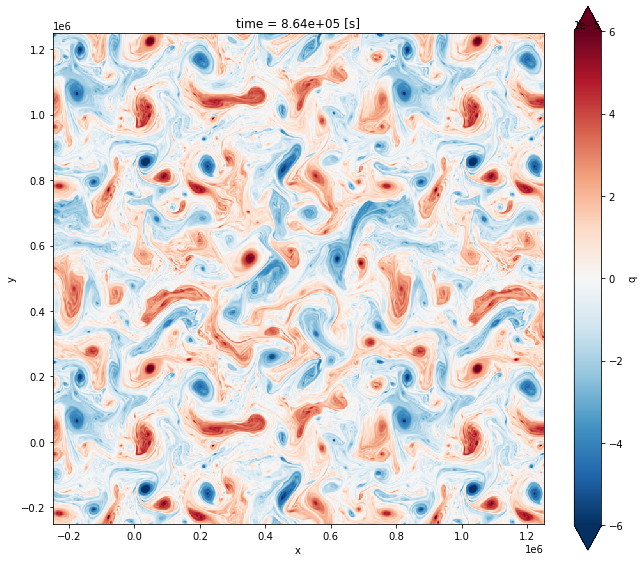

In [7]:
fig, ax = plt.subplots(figsize=(11,10))
q_dub.isel(time=0).plot(ax=ax, vmax=6e-5)
ax.set_aspect(1)

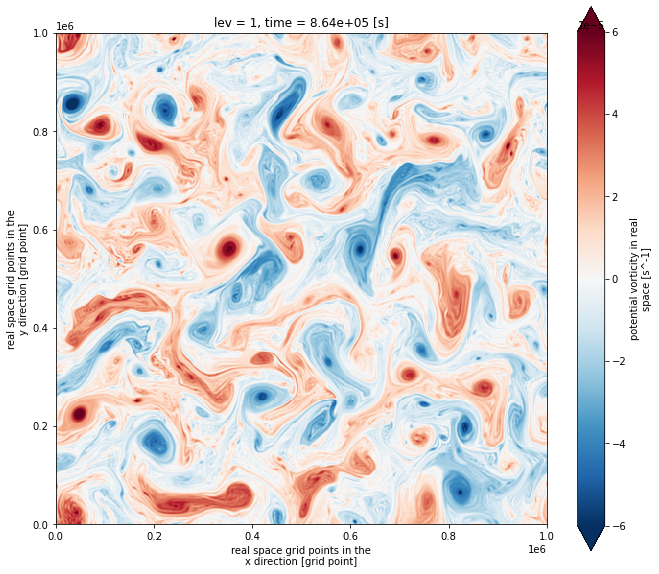

In [14]:
fig, ax = plt.subplots(figsize=(11,10))
ds.q.isel(time=0,lev=0).plot(ax=ax, vmax=6e-5)
ax.set_aspect(1)

In [6]:
z = 0
dsf = xr.open_zarr(op.join(ddir,
                   'Two-layer-QG/N%04d/Fourier-TotE-spec_rd=100km-A1e-15_lev%1d.zarr'
                           % (N,z)))
dsf

<xarray.Dataset>
Dimensions:  (time: 120, freq_r: 90)
Coordinates:
  * freq_r   (freq_r) float64 1.874e-06 4.4e-06 ... 0.0002503 0.0002531
    lev      int64 ...
  * time     (time) float64 8.64e+05 8.64e+05 8.64e+05 ... 8.64e+05 8.64e+05
Data variables:
    E        (time, freq_r) float64 dask.array<chunksize=(1, 90), meta=np.ndarray>

In [7]:
ntheta = 24
L  = 1000e3
rd = 100e3
xo = rd
dx = L/N

ssf = xr.DataArray(dsf.freq_r.data**-1/xo, dims=['scale'], 
                   coords={'scale':dsf.freq_r.data**-1/xo}
                  )
ss = xr.DataArray(np.linspace(2*dx,5*xo,30)/xo, dims=['scale'], 
                  coords={'scale':np.linspace(2*dx,5*xo,30)/xo}
                 )
ssh = xr.concat([ss.where(ss>50e3/xo).dropna('scale')[::-1],
                 ssf.where(ssf<50e3/xo).dropna('scale')],'scale')
print(len(ssf),len(ssh))

90 110


# KE cascade

/tank/users/tuchida/xrft/xrft/xrft.py:546: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/tank/users/tuchida/xrft/xrft/xrft.py:546: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/tank/users/tuchida/xrft/xrft/xrft.py:546: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/tank/users/tuchida/xrft/xrft/xrft.py:546: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordi

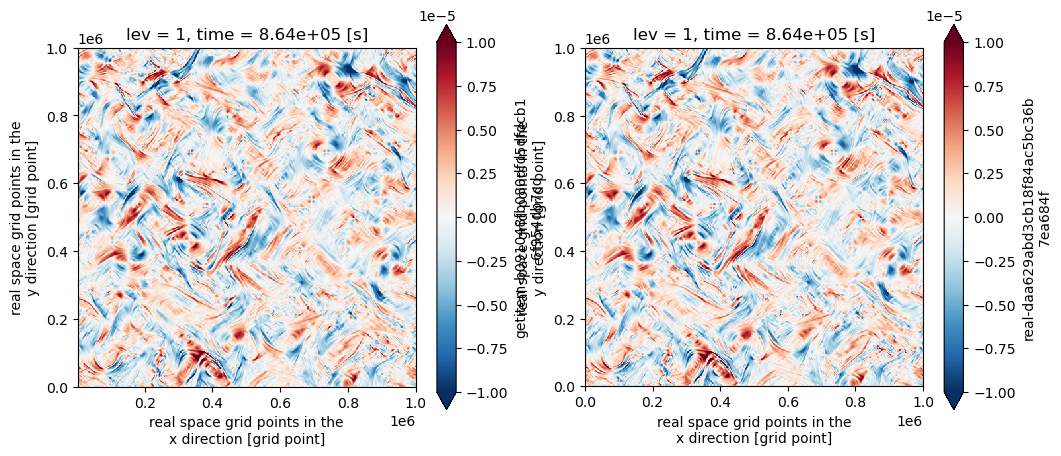

<xarray.Dataset>
Dimensions:  (time: 120, freq_r: 90)
Coordinates:
    lev      int64 1
  * time     (time) float64 8.64e+05 8.64e+05 8.64e+05 ... 8.64e+05 8.64e+05
  * freq_r   (freq_r) float64 1.874e-06 4.4e-06 ... 0.0002503 0.0002531
Data variables:
    U        (time, freq_r) float64 dask.array<chunksize=(1, 90), meta=np.ndarray>
    V        (time, freq_r) float64 dask.array<chunksize=(1, 90), meta=np.ndarray>


In [14]:
ns = 5

# for ny in range(1):
ny = 0
nx=ny

up = xr.DataArray(u_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                 x=slice(N//4+nx,N+N//4+nx)
                                ).data,
                      dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                     )
vp = xr.DataArray(v_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                 x=slice(N//4+nx,N+N//4+nx)
                                ).data,
                      dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                     )

Fu = xrft.fft(up.chunk({'y':-1,'x':-1}), dim=["y", "x"])
Fv = xrft.fft(vp.chunk({'y':-1,'x':-1}), dim=["y", "x"])
ux = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_x, dim=['freq_y','freq_x'], 
                                        # lag=[N//2,N//2]
                               ).real.data,
                      dims=up.dims, coords=up.coords
                     )
uy = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_y, dim=['freq_y','freq_x'], 
                                        # lag=[N//2,N//2]
                               ).real.data,
                      dims=up.dims, coords=up.coords
                     )
vx = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_x, dim=['freq_y','freq_x'], 
                                    # lag=[N//2,N//2]
                               ).real.data,
                      dims=vp.dims, coords=vp.coords
                     )
vy = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_y, dim=['freq_y','freq_x'], 
                                    # lag=[N//2,N//2]
                               ).real.data,
                      dims=vp.dims, coords=vp.coords
                     )
            
fig, (ax1,ax2) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
(up.isel(time=0).diff('x')/dx).plot(ax=ax1, vmax=1e-5)
ux.isel(time=0).plot(ax=ax2, vmax=1e-5)
ax1.set_aspect(1)
ax2.set_aspect(1)
plt.show()
            
uux = (up*ux).load().chunk({'time':1})
vuy = (vp*uy).load().chunk({'time':1})
uvx = (up*vx).load().chunk({'time':1})
vvy = (vp*vy).load().chunk({'time':1})
    
iso_csUf = xrft.isotropic_cross_spectrum(
                            up.chunk({'y':-1,'x':-1}), 
                            (uux+vuy).chunk({'y':-1,'x':-1}), 
                            dim=['y','x'], true_phase=True,
                            true_amplitude=True, truncate=True
                           ).real
iso_csVf = xrft.isotropic_cross_spectrum(
                            vp.chunk({'y':-1,'x':-1}), 
                            (uvx+vvy).chunk({'y':-1,'x':-1}),  
                            dim=["y", "x"], true_phase=True,
                            true_amplitude=True, truncate=True
                           ).real
#######################    
dsave = iso_csUf.to_dataset(name='U')
dsave['V'] = iso_csVf
        # dsave.to_zarr(op.join(ddir,'Two-layer-QG/Cal1/Wavelet-KE-flux_lev%1d.zarr' 
        #                       % (z)), mode='w')
if run == 2:
    dsave.to_zarr(op.join(ddir,
                        'Two-layer-QG/N%04d/Fourier-KE-flux_rd=100km-A1e-15_lev%1d_%02d.zarr' 
                          % (N,z,run)), mode='w')
else:
    dsave.to_zarr(op.join(ddir,
                        'Two-layer-QG/N%04d/Fourier-KE-flux_rd=100km-A1e-15_lev%1d.zarr' 
                          % (N,z)), mode='w')
print(dsave)
dsave.close()

del up, vp, Fu, Fv,uux,vuy,uvx,vvy

In [1]:
ns = 5

# for ny in np.concatenate((np.arange(95,130,ns,dtype=int),
#                           np.arange(-125,0,ns,dtype=int))):
for ny in np.arange(-45,0,ns,dtype=int):
    nx=ny
    # if np.abs(ny) < 3 and np.abs(nx) < 3:
    #     pass
    # else:
    up = xr.DataArray(u_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                 x=slice(N//4+nx,N+N//4+nx)
                                ).data,
                      dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                     )
    vp = xr.DataArray(v_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                 x=slice(N//4+nx,N+N//4+nx)
                                ).data,
                      dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                     )

    Fu = xrft.fft(up.chunk({'y':-1,'x':-1}), dim=["y", "x"])
    Fv = xrft.fft(vp.chunk({'y':-1,'x':-1}), dim=["y", "x"])
    ux = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_x, dim=['freq_y','freq_x'], 
                                        # lag=[N//2,N//2]
                               ).real.data,
                      dims=up.dims, coords=up.coords
                     )
    uy = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_y, dim=['freq_y','freq_x'], 
                                        # lag=[N//2,N//2]
                               ).real.data,
                      dims=up.dims, coords=up.coords
                     )
    vx = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_x, dim=['freq_y','freq_x'], 
                                    # lag=[N//2,N//2]
                               ).real.data,
                      dims=vp.dims, coords=vp.coords
                     )
    vy = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_y, dim=['freq_y','freq_x'], 
                                    # lag=[N//2,N//2]
                               ).real.data,
                      dims=vp.dims, coords=vp.coords
                     )
            
    # fig, (ax1,ax2) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
    # (vp.isel(time=0).diff('y')/dx).plot(ax=ax1, vmax=1e-5)
    # vy.isel(time=0).plot(ax=ax2, vmax=1e-5)
    # ax1.set_aspect(1)
    # ax2.set_aspect(1)
    # plt.show()
            
    uux = (up*ux).load().chunk({'time':1,'y':128,'x':128})
    vuy = (vp*uy).load().chunk({'time':1,'y':128,'x':128})
    uvx = (up*vx).load().chunk({'time':1,'y':128,'x':128})
    vvy = (vp*vy).load().chunk({'time':1,'y':128,'x':128})
    
    iso_csUw = xwavelet.wvlt_cross_spectrum(
                                    up.chunk({'y':128,'x':128}), 
                                    uux+vuy, ssh, dim=["y", "x"], xo=xo, ntheta=ntheta
                           ).real
    iso_csVw = xwavelet.wvlt_cross_spectrum(
                                    vp.chunk({'y':128,'x':128}), 
                                    uvx+vvy, ssh, dim=["y", "x"], xo=xo, ntheta=ntheta
                           ).real
#######################
    if ny == 0 and nx == 0:
        dsave = iso_csUw.to_dataset(name='U')
        dsave['V'] = iso_csVw

        if run == 2:
            dsave.chunk({'angle':4}).to_zarr(op.join(ddir,
                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d.zarr' 
                                  % (N,z,run)), mode='w')
        else:
            dsave.chunk({'angle':4}).to_zarr(op.join(ddir,
                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d.zarr' 
                                  % (N,z)), mode='w')
        print(dsave)
        dsave.close()
#######################
    else:
        dsave = iso_csUw.to_dataset(name='U')
        dsave['V'] = iso_csVw
        dsave = dsave.chunk({'angle':4})

        if run == 2:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_-%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_-%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
        else:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_-%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_-%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
        print(dsave)
        dsave.close()
    del up, vp, Fu, Fv,uux,vuy,uvx,vvy
#######################
    nx=-ny
    if ny == 0 and nx == 0:
        pass
#######################
    else:
        up = xr.DataArray(u_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                     x=slice(N//4+nx,N+N//4+nx)
                                    ).data,
                          dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                         )
        vp = xr.DataArray(v_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                     x=slice(N//4+nx,N+N//4+nx)
                                    ).data,
                          dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                         )

        Fu = xrft.fft(up.chunk({'y':-1,'x':-1}), dim=["y", "x"])
        Fv = xrft.fft(vp.chunk({'y':-1,'x':-1}), dim=["y", "x"])
        ux = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_x, dim=['freq_y','freq_x'], 
                                                # lag=[N//2,N//2]
                                   ).real.data,
                          dims=up.dims, coords=up.coords
                         )
        uy = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_y, dim=['freq_y','freq_x'], 
                                          # lag=[N//2,N//2]
                                   ).real.data,
                          dims=up.dims, coords=up.coords
                         )
        vx = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_x, dim=['freq_y','freq_x'], 
                                            # lag=[N//2,N//2]
                                   ).real.data,
                          dims=vp.dims, coords=vp.coords
                         )
        vy = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_y, dim=['freq_y','freq_x'], 
                                            # lag=[N//2,N//2]
                                   ).real.data,
                          dims=vp.dims, coords=vp.coords
                         )

        uux = (up*ux).load().chunk({'time':1,'y':128,'x':128})
        vuy = (vp*uy).load().chunk({'time':1,'y':128,'x':128})
        uvx = (up*vx).load().chunk({'time':1,'y':128,'x':128})
        vvy = (vp*vy).load().chunk({'time':1,'y':128,'x':128})
        
        iso_csUw = xwavelet.wvlt_cross_spectrum(
                                        up.chunk({'y':128,'x':128}), 
                                        uux+vuy, ssh, dim=["y", "x"], xo=xo, ntheta=ntheta
                                   ).real
        iso_csVw = xwavelet.wvlt_cross_spectrum(
                                        vp.chunk({'y':128,'x':128}), 
                                        uvx+vvy, ssh, dim=["y", "x"], xo=xo, ntheta=ntheta
                                   ).real
#######################
        dsave = iso_csUw.to_dataset(name='U')
        dsave['V'] = iso_csVw
        dsave = dsave.chunk({'angle':4})
            # dsave.to_zarr(op.join(ddir,'Two-layer-QG/Cal1/Wavelet-KE-flux_lev%1d.zarr' 
            #                       % (z)), mode='w')
        if run == 2:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_-%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_-%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
        else:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_-%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_-%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
        print(dsave)
        dsave.close()
        del up, vp, Fu, Fv,uux,vuy,uvx,vvy
    client.restart()
    print(ny)

In [2]:
ns = 5

# for ny in np.arange(-30,0,ns,dtype=int):
for ny in np.concatenate((np.arange(0,130,ns,dtype=int),
                          np.arange(-125,0,ns,dtype=int))):
    nx=ny
    # if np.abs(ny) < 3 and np.abs(nx) < 3:
    #     pass
    # else:
    up = xr.DataArray(u_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                 x=slice(N//4+nx,N+N//4+nx)
                                ).data,
                      dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                     )
    vp = xr.DataArray(v_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                 x=slice(N//4+nx,N+N//4+nx)
                                ).data,
                      dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                     )

    Fu = xrft.fft(up.chunk({'y':-1,'x':-1}), dim=["y", "x"])
    Fv = xrft.fft(vp.chunk({'y':-1,'x':-1}), dim=["y", "x"])
    ux = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_x, dim=['freq_y','freq_x'], 
                                        # lag=[N//2,N//2]
                               ).real.data,
                      dims=up.dims, coords=up.coords
                     )
    uy = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_y, dim=['freq_y','freq_x'], 
                                        # lag=[N//2,N//2]
                               ).real.data,
                      dims=up.dims, coords=up.coords
                     )
    vx = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_x, dim=['freq_y','freq_x'], 
                                    # lag=[N//2,N//2]
                               ).real.data,
                      dims=vp.dims, coords=vp.coords
                     )
    vy = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_y, dim=['freq_y','freq_x'], 
                                    # lag=[N//2,N//2]
                               ).real.data,
                      dims=vp.dims, coords=vp.coords
                     )
            
    # fig, (ax1,ax2) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
    # (up.isel(time=0).diff('x')/dx).plot(ax=ax1, vmax=1e-5)
    # ux.isel(time=0).plot(ax=ax2, vmax=1e-5)
    # ax1.set_aspect(1)
    # ax2.set_aspect(1)
    # plt.show()
            
    uux = (up*ux).load().chunk({'time':1,'y':128,'x':128})
    vuy = (vp*uy).load().chunk({'time':1,'y':128,'x':128})
    uvx = (up*vx).load().chunk({'time':1,'y':128,'x':128})
    vvy = (vp*vy).load().chunk({'time':1,'y':128,'x':128})
    
    iso_csUw = xwavelet.wvlt_cross_spectrum(
                                    up.chunk({'y':128,'x':128}), 
                                    uux+vuy, ssf, dim=["y", "x"], xo=xo, ntheta=ntheta
                           ).real
    iso_csVw = xwavelet.wvlt_cross_spectrum(
                                    vp.chunk({'y':128,'x':128}), 
                                    uvx+vvy, ssf, dim=["y", "x"], xo=xo, ntheta=ntheta
                           ).real
#######################    
    if ny == 0 and nx == 0:
        dsave = iso_csUw.to_dataset(name='U')
        dsave['V'] = iso_csVw

        if run == 2:
            dsave.chunk({'angle':4}).to_zarr(op.join(ddir,
                        'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d.zarr' 
                                  % (N,z,run)), mode='w')
        else:
            dsave.chunk({'angle':4}).to_zarr(op.join(ddir,
                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d.zarr' 
                                  % (N,z)), mode='w')
        print(dsave)
        dsave.close()
#######################
    else:
        dsave = iso_csUw.to_dataset(name='U')
        dsave['V'] = iso_csVw
        dsave = dsave.chunk({'angle':4})

        if run == 2:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_-%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_-%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
        else:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_-%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_-%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
        print(dsave)
        dsave.close()
    del up, vp, Fu, Fv,uux,vuy,uvx,vvy
#######################
    nx=-ny
    if ny == 0 and nx == 0:
        pass
#######################
    else:
        up = xr.DataArray(u_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                     x=slice(N//4+nx,N+N//4+nx)
                                    ).data,
                          dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                         )
        vp = xr.DataArray(v_dub.isel(y=slice(N//4+ny,N+N//4+ny),
                                     x=slice(N//4+nx,N+N//4+nx)
                                    ).data,
                          dims=ds.u.isel(lev=0).dims, coords=ds.u.isel(lev=0).coords
                         )

        Fu = xrft.fft(up.chunk({'y':-1,'x':-1}), dim=["y", "x"])
        Fv = xrft.fft(vp.chunk({'y':-1,'x':-1}), dim=["y", "x"])
        ux = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_x, dim=['freq_y','freq_x'], 
                                                # lag=[N//2,N//2]
                                   ).real.data,
                          dims=up.dims, coords=up.coords
                         )
        uy = xr.DataArray(xrft.ifft(2j*np.pi*Fu*Fu.freq_y, dim=['freq_y','freq_x'], 
                                          # lag=[N//2,N//2]
                                   ).real.data,
                          dims=up.dims, coords=up.coords
                         )
        vx = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_x, dim=['freq_y','freq_x'], 
                                            # lag=[N//2,N//2]
                                   ).real.data,
                          dims=vp.dims, coords=vp.coords
                         )
        vy = xr.DataArray(xrft.ifft(2j*np.pi*Fv*Fv.freq_y, dim=['freq_y','freq_x'], 
                                            # lag=[N//2,N//2]
                                   ).real.data,
                          dims=vp.dims, coords=vp.coords
                         )

        uux = (up*ux).load().chunk({'time':1,'y':128,'x':128})
        vuy = (vp*uy).load().chunk({'time':1,'y':128,'x':128})
        uvx = (up*vx).load().chunk({'time':1,'y':128,'x':128})
        vvy = (vp*vy).load().chunk({'time':1,'y':128,'x':128})
        
        iso_csUw = xwavelet.wvlt_cross_spectrum(
                                            up.chunk({'y':128,'x':128}), 
                                            uux+vuy, ssf, dim=["y", "x"], xo=xo, ntheta=ntheta
                                   ).real
        iso_csVw = xwavelet.wvlt_cross_spectrum(
                                            vp.chunk({'y':128,'x':128}), 
                                            uvx+vvy, ssf, dim=["y", "x"], xo=xo, ntheta=ntheta
                                   ).real
#######################
        dsave = iso_csUw.to_dataset(name='U')
        dsave['V'] = iso_csVw
        dsave = dsave.chunk({'angle':4})

        if run == 2:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_-%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_-%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_%03d-%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_%03d%03d.zarr' 
                                          % (N,z,run,np.abs(ny),np.abs(nx))), mode='w')
        else:
            if ny < 0:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_-%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_-%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
            else:
                if nx < 0:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%03d-%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
                else:
                    dsave.to_zarr(op.join(ddir,
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%03d%03d.zarr' 
                                          % (N,z,np.abs(ny),np.abs(nx))), mode='w')
        print(dsave)
        dsave.close()
        del up, vp, Fu, Fv,uux,vuy,uvx,vvy
    client.restart()
    print(ny)

In [11]:
z=0
dsf   = xr.open_zarr(op.join(ddir, 
                    'Two-layer-QG/N%04d/Fourier-KE-flux_rd=100km-A1e-15_lev%1d.zarr' 
                            % (N,z)))
dsw   = xr.open_zarr(op.join(ddir, 
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d.zarr' 
                            % (N,z)))                  
dswf  = xr.open_zarr(op.join(ddir, 
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d.zarr' 
                            % (N,z)))
dsf2  = xr.open_zarr(op.join(ddir, 
                    'Two-layer-QG/N%04d/Fourier-KE-flux_rd=100km-A1e-15_lev%1d_%02d.zarr' 
                            % (N,z,run)))
dsw2  = xr.open_zarr(op.join(ddir, 
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d.zarr' 
                            % (N,z,run)))                  
dswf2 = xr.open_zarr(op.join(ddir, 
                    'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d.zarr' 
                            % (N,z,run)))
dsf

<xarray.Dataset>
Dimensions:  (time: 120, freq_r: 90)
Coordinates:
  * freq_r   (freq_r) float64 1.874e-06 4.4e-06 ... 0.0002503 0.0002531
    lev      int64 ...
  * time     (time) float64 8.64e+05 8.64e+05 8.64e+05 ... 8.64e+05 8.64e+05
Data variables:
    U        (time, freq_r) float64 dask.array<chunksize=(1, 90), meta=np.ndarray>
    V        (time, freq_r) float64 dask.array<chunksize=(1, 90), meta=np.ndarray>

In [12]:
ns = 125
for ny in range(-ns,ns+1):
    for nx in range(-ns,ns+1):
        if ny == 0 and nx == 0:
            pass
        else:
            if ny < 0:
                if nx < 0:
                    try:
                        dsw  = xr.concat([dsw,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_-%03d-%03d.zarr' 
                                                                   % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid')
                        dswf = xr.concat([dswf,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_-%03d-%03d.zarr' 
                                                                    % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
                else:
                    try:
                        dsw  = xr.concat([dsw,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_-%03d%03d.zarr' 
                                                                   % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid')
                        dswf = xr.concat([dswf,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_-%03d%03d.zarr' 
                                                                    % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
            else:
                if nx < 0:
                    try:
                        dsw  = xr.concat([dsw,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%03d-%03d.zarr' 
                                                                   % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid')
                        dswf = xr.concat([dswf,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%03d-%03d.zarr' 
                                                                    % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
                else:
                    try:
                        dsw  = xr.concat([dsw,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%03d%03d.zarr' 
                                                                   % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                        dswf = xr.concat([dswf,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%03d%03d.zarr' 
                                                                    % (N,z,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
############################                     
for ny in range(-ns,ns+1):
    for nx in range(-ns,ns+1):
        if ny == 0 and nx == 0:
            pass
        else:
            if ny < 0:
                if nx < 0:
                    try:
                        dsw2  = xr.concat([dsw2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_-%03d-%03d.zarr' 
                                                                   % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid')
                        dswf2 = xr.concat([dswf2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_-%03d-%03d.zarr' 
                                                                    % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
                else:
                    try:
                        dsw2  = xr.concat([dsw2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_-%03d%03d.zarr' 
                                                                   % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid')
                        dswf2 = xr.concat([dswf2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_-%03d%03d.zarr' 
                                                                    % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
            else:
                if nx < 0:
                    try:
                        dsw2  = xr.concat([dsw2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_%03d-%03d.zarr' 
                                                                   % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid')
                        dswf2 = xr.concat([dswf2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_%03d-%03d.zarr' 
                                                                    % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass
                else:
                    try:
                        dsw2  = xr.concat([dsw2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_HighK_rd=100km-A1e-15_lev%1d_%02d_%03d%03d.zarr' 
                                                                   % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                        dswf2 = xr.concat([dswf2,xr.open_zarr(op.join(ddir,
                                            'Two-layer-QG/N%04d/Wavelet-KE-flux_FourierK_rd=100km-A1e-15_lev%1d_%02d_%03d%03d.zarr' 
                                                                    % (N,z,run,np.abs(ny),np.abs(nx))))
                                         ], 'grid') 
                    except:
                        pass

In [23]:
# dks = xr.DataArray(xr.DataArray(np.abs(np.diff(dsw.scale**-1)).data, dims='scale',
#                                 coords={'scale':.5*(dsw.scale[1:].data**-1 + dsw.scale[:-1].data**-1)}
#                                ).interp(scale=dsw.scale**-1, kwargs={"fill_value":"extrapolate"}).data,
#                    dims='scale', coords={'scale':dsw.scale}
#                   )
dks = xr.DataArray(np.abs(np.diff(dsw.scale**-1)).data, dims='scale',
                   coords={'scale':.5*(dsw.scale[1:].data + dsw.scale[:-1].data)}
                  ).interp(scale=dsw.scale, kwargs={"fill_value":"extrapolate"})
Aw = -(dsw.U + dsw.V).real
piw  = (Aw * dks)[...,::-1].cumsum('scale')[...,::-1]

dks = xr.DataArray(np.abs(np.diff(dsf.freq_r)).data, dims='scale',
                   coords={'scale':.5*(dsf.freq_r[1:].data + dsf.freq_r[:-1].data)}
                  ).interp(scale=dsf.freq_r, kwargs={"fill_value": "extrapolate"})
pif = (-(dsf.U+dsf.V).real * dks
      )[...,::-1].cumsum('freq_r')[...,::-1]

dks = xr.DataArray(np.abs(np.diff(dsf.freq_r)).data, dims='scale',
                   coords={'scale':.5*(dswf.scale[1:].data + dswf.scale[:-1].data)}
                  ).interp(scale=dswf.scale, kwargs={"fill_value": "extrapolate"})
Awf = -(dswf.U + dswf.V).real
piwf = (Awf * dks)[...,::-1].cumsum('scale')[...,::-1]
piwf

<xarray.DataArray (grid: 101, time: 120, angle: 12, scale: 90)>
dask.array<getitem, shape=(101, 120, 12, 90), dtype=float64, chunksize=(1, 1, 4, 90), chunktype=numpy.ndarray>
Coordinates:
  * angle    (angle) float64 0.0 0.2618 0.5236 0.7854 ... 2.094 2.356 2.618 2.88
    lev      int64 1
  * scale    (scale) float64 5.335e+05 2.273e+05 ... 3.995e+03 3.951e+03
  * time     (time) float64 8.64e+05 8.64e+05 8.64e+05 ... 8.64e+05 8.64e+05
Dimensions without coordinates: grid

In [19]:
from scipy.stats import bootstrap

In [24]:
datas = (piw.mean(['grid']).sum('angle')
         * np.diff(dsw.angle)[0]*2*1e9,)  # samples must be in a sequence
rng = np.random.default_rng()
Pw = bootstrap(datas, np.mean, confidence_level=0.95,
               random_state=rng
              )

datas = (piw.isel(grid=0).sum('angle')
         * np.diff(dsw.angle)[0]*2*1e9,)  # samples must be in a sequence
rng = np.random.default_rng()
Pwk = bootstrap(datas, np.mean, confidence_level=0.95,
               random_state=rng
               )

datas = (pif * 1e9 * 2*np.pi,)  # samples must be in a sequence
rng = np.random.default_rng()
Pf = bootstrap(datas, np.mean, confidence_level=0.95,
               random_state=rng
              )

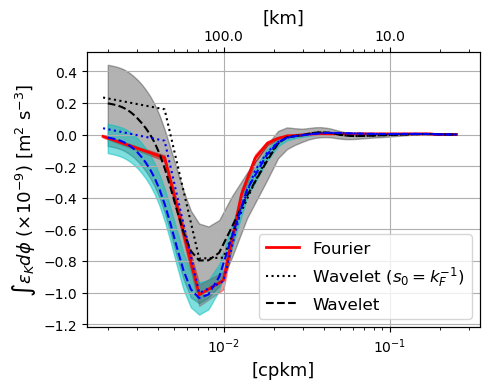

In [27]:
fig, ax = plt.subplots(figsize=(5,4))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax3 = ax.twiny()

ax.fill_between(dsf.freq_r*1e3, 
                Pf.confidence_interval.low, Pf.confidence_interval.high, 
                alpha=.4, color='r')
ax.fill_between((dsw.scale)**-1*1e3, 
                Pwk.confidence_interval.low, Pwk.confidence_interval.high, 
                alpha=.3, color='k')
ax.fill_between((dsw.scale)**-1*1e3, 
                Pw.confidence_interval.low, Pw.confidence_interval.high, 
                alpha=.5, color='c')

ax.plot(dsf.freq_r*1e3, pif.mean('time')*1e9 * 2*np.pi,
        'r', lw=2, label=r"Fourier")
ax.plot((dswf.scale)**-1*1e3, 
        piwf.isel(grid=0).mean('time').sum('angle') * np.diff(dswf.angle)[0]*2*1e9,
        'k:', label=r"Wavelet ($s_0 = k_F^{-1}$)")
ax.plot((dsw.scale)**-1*1e3, 
        piw.isel(grid=0).mean('time').sum('angle') * np.diff(dsw.angle)[0]*2*1e9,
        'k--', label=r"Wavelet")
ax.plot((dswf.scale)**-1*1e3, 
        piwf.mean(['grid','time']).sum('angle') * np.diff(dswf.angle)[0]*2*1e9,
        'b:')
ax.plot((dsw.scale)**-1*1e3, 
        piw.mean(['grid','time']).sum('angle') * np.diff(dsw.angle)[0]*2*1e9,
        'b--')

    
ax.set_xscale('log')
ax3.set_xscale('log')

ax.set_xlim([1.5e-3,3.5e-1])
ax3.set_xlim([1.5e-3,3.5e-1])
ax3.set_xticks([1e-2,1e-1])
ax3.set_xticklabels([1e2,1e1])
ax.set_xlabel(r"[cpkm]", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)

ax.set_ylabel(r"$\int\epsilon_Kd\phi$ ($\times 10^{-9}$) [m$^2$ s$^{-3}$]", fontsize=13)
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)
# plt.savefig(op.join(ddir,'Figs/WvsF_QG-lev%1d_KE-flux.pdf' % z))
plt.savefig(op.join(ddir,'Figs/WvsF_QG_rd=100km-A1e-15_lev%1d_KE-flux.pdf' % z))

In [25]:
datas = (Aw.mean(['grid']).sum('angle')
         * np.diff(dsw.angle)[0]*2*1e1*1e3,)  # samples must be in a sequence
rng = np.random.default_rng()
Awc = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng
               )

datas = (Aw.isel(grid=0).sum('angle')
         * np.diff(dsw.angle)[0]*2*1e1*1e3,)  # samples must be in a sequence
rng = np.random.default_rng()
Awk = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng
               )

datas = (-(dsf.U+dsf.V) * 1e1*1e3 * 2*np.pi,)  # samples must be in a sequence
rng = np.random.default_rng()
Afc = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng
               )

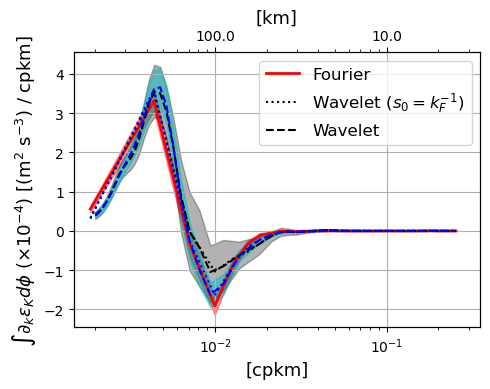

In [28]:
fig, ax = plt.subplots(figsize=(5,4))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax3 = ax.twiny()

ax.fill_between(dsf.freq_r*1e3, 
                Afc.confidence_interval.low, Afc.confidence_interval.high, 
                alpha=.4, color='r')
ax.fill_between((dsw.scale)**-1*1e3, 
                Awk.confidence_interval.low, Awk.confidence_interval.high, 
                alpha=.3, color='k')
ax.fill_between((dsw.scale)**-1*1e3, 
                Awc.confidence_interval.low, Awc.confidence_interval.high, 
                alpha=.5, color='c')


ax.plot(dsf.freq_r*1e3, -(dsf.U+dsf.V).mean('time') * 2*np.pi*1e1*1e3,
        'r', lw=2, label=r"Fourier")
ax.plot(dswf.scale**-1*1e3, 
        Awf.isel(grid=0).mean('time').sum('angle') * np.diff(dswf.angle)[0]*2*1e1*1e3,
        'k:', label=r"Wavelet ($s_0 = k_F^{-1}$)")
ax.plot(dsw.scale**-1*1e3, 
        Aw.isel(grid=0).mean('time').sum('angle') * np.diff(dsw.angle)[0]*2*1e1*1e3,
        'k--', label=r"Wavelet")
ax.plot(dswf.scale**-1*1e3, 
        Awf.mean(['grid','time']).sum('angle') * np.diff(dswf.angle)[0]*2*1e1*1e3,
        'b:')
ax.plot(dsw.scale**-1*1e3, 
        Aw.mean(['grid','time']).sum('angle') * np.diff(dsw.angle)[0]*2*1e1*1e3,
        'b--')


ax.set_xscale('log')
ax3.set_xscale('log')

ax.set_xlim([1.5e-3,3.5e-1])
ax3.set_xlim([1.5e-3,3.5e-1])
ax3.set_xticks([1e-2,1e-1])
ax3.set_xticklabels([1e2,1e1])
ax.set_xlabel(r"[cpkm]", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)

ax.set_ylabel(r"$\int\partial_k\epsilon_Kd\phi$ ($\times 10^{-4}$) [(m$^2$ s$^{-3}$) / cpkm]", 
              fontsize=13)
ax.legend(loc='upper right', fontsize=12)
ax.grid(True)

plt.savefig(op.join(ddir,'Figs/WvsF_QG_rd=100km-A1e-15_lev%1d_KE-trans.pdf' % (z)))

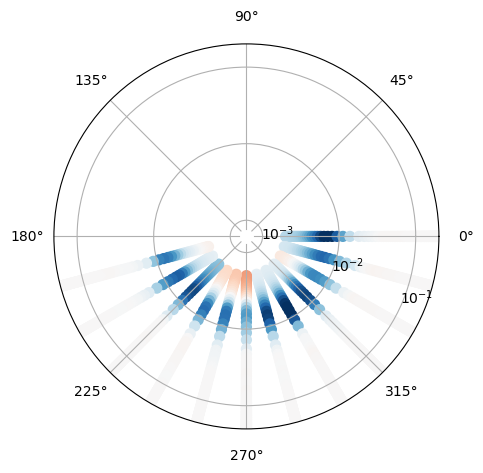

In [35]:
def polar_twin(ax):
    ax2 = ax.figure.add_axes(ax.get_position(), projection='polar', 
                             label='twin', frameon=False,
                             theta_direction=ax.get_theta_direction(),
                             theta_offset=ax.get_theta_offset())
    ax2.xaxis.set_visible(False)
    # # There should be a method for this, but there isn't... Pull request?
    # ax2._r_label_position._t = (22.5 + 180, 0.0)
    # ax2._r_label_position.invalidate()
    # # Ensure that original axes tick labels are on top of plots in twinned axes
    # for label in ax.get_yticklabels():
    #     ax.figure.texts.append(label)
    return ax2


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax2 = polar_twin(ax)
for i in range(len(piw.angle)):
    im = ax.scatter(-piw.angle.isel(angle=i).values*np.ones_like(piw.scale), 
                    piw.scale**-1*1e3, 
                    c=piw.isel(angle=i).mean(['grid','time'])*1e9, 
                    cmap='RdBu_r', vmax=.2, vmin=-.2, s=50)

ax.set_rticks([1e-3, 1e-2]) 
ax.set_rlabel_position(-24.5) 
ax.set_rlim(9e-4, piw.scale[-1]**-1*1e3)
ax.set_rscale('symlog', linthresh=1e-3)
ax.grid(True)
ax2.grid(False)
ax2.set_yticklabels([])
plt.savefig(op.join(ddir,'Figs/QG_rd=100km-A1e-15_lev%1d_Polar_KEflux.pdf' % z))

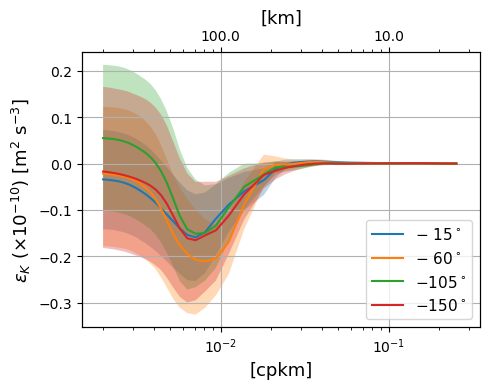

In [36]:
angles = np.arange(0,180,15)

fig, ax = plt.subplots(figsize=(5,4))
fig.set_tight_layout(True)
ax3 = ax.twiny()

for i in range(1,len(piw.angle),3):
    datas = (piw.isel(angle=i).mean(['grid']) * 1e9,)  # samples must be in a sequence
    rng = np.random.default_rng()
    Pw  = bootstrap(datas, np.mean, confidence_level=0.95,
                    random_state=rng
                   )
    ax.fill_between((dsw.scale)**-1*1e3, 
                    Pw.confidence_interval.low, Pw.confidence_interval.high, 
                    alpha=.3)

    ax.plot((dsw.scale)**-1*1e3, 
            piw.isel(angle=i).mean(['grid','time']) * 1e9,
            label=r"$-$%3d" % angles[i]+r"$^\circ$")

ax.set_xscale('log')
ax3.set_xscale('log')

ax.set_xlim([1.5e-3,3.5e-1])
ax3.set_xlim([1.5e-3,3.5e-1])
ax3.set_xticks([1e-2,1e-1])
ax3.set_xticklabels([1e2,1e1])
ax.set_xlabel(r"[cpkm]", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)

ax.set_ylabel(r"$\epsilon_K$ ($\times 10^{-10}$) [m$^2$ s$^{-3}$]", fontsize=13)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True)
plt.savefig(op.join(ddir,'Figs/QG_rd=100km-A1e-15_lev%1d_AngularConf_KEflux.pdf' % z))

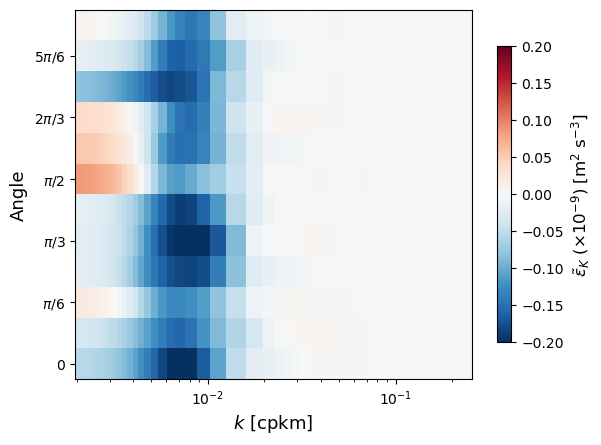

In [32]:
fig, ax = plt.subplots()
im = ax.pcolormesh((piw.scale)**-1*1e3, piw.angle, 
                   piw.mean(['grid','time'])*1e9,
                   vmax=.2, vmin=-.2,
                   cmap='RdBu_r', rasterized=True
                  )
ax.set_xscale('log')
ax.set_xlabel(r"$k$ [cpkm]", fontsize=13)
ax.set_ylabel(r"Angle", fontsize=13)
ax.set_yticks([piw.angle[0], piw.angle[2], piw.angle[4], piw.angle[6], piw.angle[8], piw.angle[-2]])
ax.set_yticklabels(['0', r"$\pi/6$", r"$\pi/3$", r"$\pi/2$", r"$2\pi/3$", r"$5\pi/6$"])
cbar = fig.colorbar(im, ax=ax, shrink=.8)
cbar.set_label(r"$\tilde{\epsilon}_K$ ($\times 10^{-9}$) [m$^{2}$ s$^{-3}$]", fontsize=12)

plt.savefig(op.join(ddir,'Figs/QG_rd=100km-A1e-15_lev%1d_Angular_KEflux.pdf' % z))